#Biodata



*   Nama : Rafian Ramadhani
*   Username : Rafian
*   Email : rafianramadhani@gmail.com
*   Pekerjaan : Mahasiswa
*   Link Googlecollab :
https://colab.research.google.com/drive/1L2PyCApUeuF5UHu2P81Ta-c6CV4vw0P-?usp=sharing



#Install Tensorflow dan Panggil Library yang dibutuhkan

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from tensorflow import keras
from keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Download Data

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-12 17:17:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  2.34MB/s    in 52s     

2021-07-12 17:17:59 (5.90 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



#Inisiasi Lokasi Data

In [48]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/latianml')
zip_ref.close()

base_dir = '/latianml/rockpaperscissors'

In [49]:
import shutil
shutil.rmtree(os.path.join(base_dir, 'rps-cv-images'))
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))

In [50]:
os.listdir(base_dir)

['rock', 'paper', 'scissors']

#Lakukan Image Generator untuk Persiapan dan Split Data

In [51]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=90,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    validation_split = 0.2)


In [52]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical',
        shuffle = True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 150),
        batch_size=32, 
        class_mode='categorical',
        shuffle = True,
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


#Arsitektur CNN

In [53]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#Compile model dengan 'adam' optimizer loss function Category Crossentropy 

In [54]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy above 92%, finish training!")
      self.model.stop_training = True

callbacks = myCallback()

In [55]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Train Model

In [56]:
 history = model.fit(
             train_generator,
             steps_per_epoch=25,  
             epochs=20,
             validation_data=val_generator, 
             validation_steps=5, 
             callbacks = [callbacks], 
             verbose=2)

Epoch 1/20
25/25 - 46s - loss: 1.1579 - accuracy: 0.3475 - val_loss: 1.0947 - val_accuracy: 0.4250
Epoch 2/20
25/25 - 44s - loss: 1.0344 - accuracy: 0.4564 - val_loss: 0.9338 - val_accuracy: 0.6187
Epoch 3/20
25/25 - 45s - loss: 0.9133 - accuracy: 0.5587 - val_loss: 0.8530 - val_accuracy: 0.6438
Epoch 4/20
25/25 - 45s - loss: 0.7128 - accuracy: 0.7300 - val_loss: 0.6032 - val_accuracy: 0.8125
Epoch 5/20
25/25 - 44s - loss: 0.5576 - accuracy: 0.7825 - val_loss: 0.4290 - val_accuracy: 0.8125
Epoch 6/20
25/25 - 44s - loss: 0.3708 - accuracy: 0.8786 - val_loss: 0.3429 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 45s - loss: 0.4274 - accuracy: 0.8445 - val_loss: 0.3538 - val_accuracy: 0.8875
Epoch 8/20
25/25 - 48s - loss: 0.2586 - accuracy: 0.9050 - val_loss: 0.3350 - val_accuracy: 0.8625
Epoch 9/20
25/25 - 48s - loss: 0.1821 - accuracy: 0.9413 - val_loss: 0.1287 - val_accuracy: 0.9625

Accuracy above 92%, finish training!


#EDA Hasil Prediksi

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

akurasi = hasil.history['accuracy']
vallidasi_akurasi = hasil.history['val_accuracy']

loss = hasil.history['loss']
validasi_loss = hasil.history['val_loss']

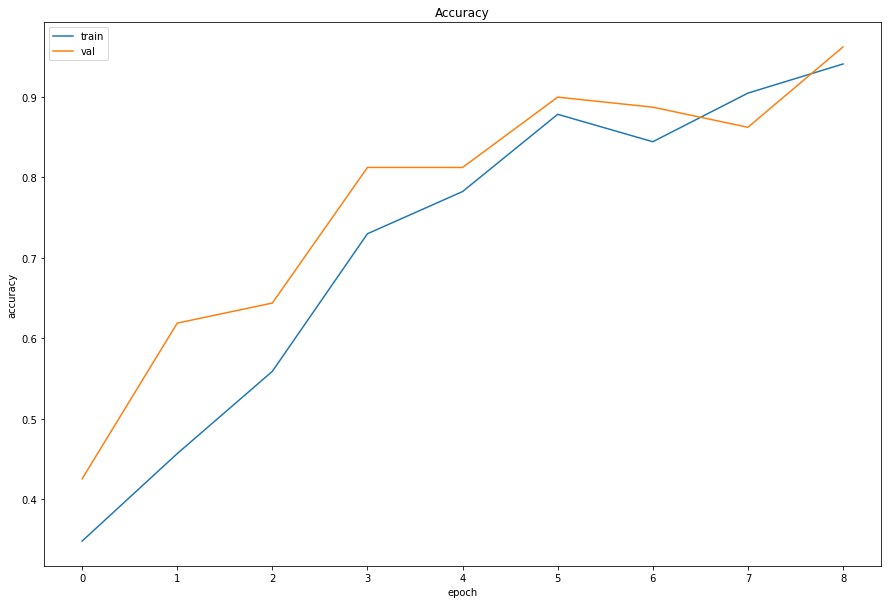

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

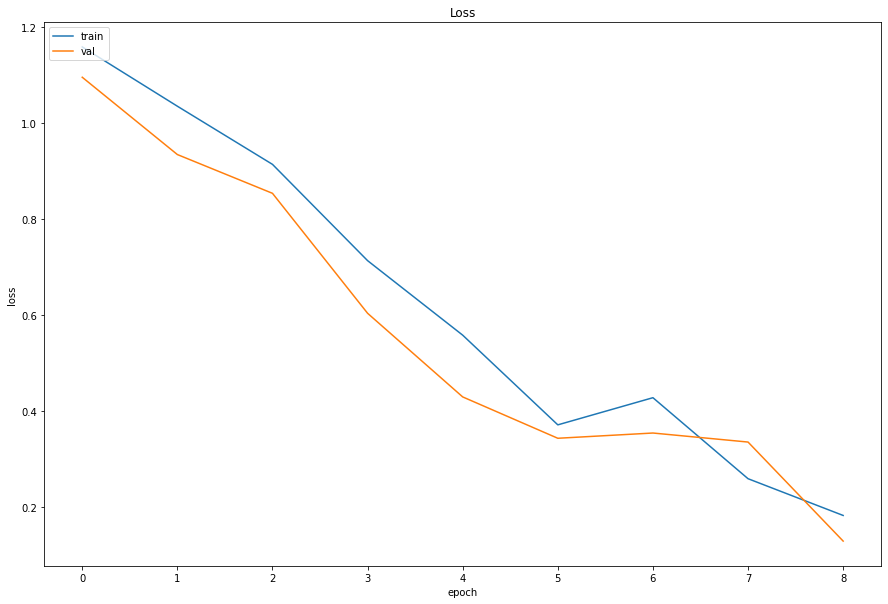

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [62]:
# Konversi model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp8rvnzi4c/assets


INFO:tensorflow:Assets written to: /tmp/tmp8rvnzi4c/assets


In [63]:
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.pb') 

INFO:tensorflow:Assets written to: my_model.pb/assets


INFO:tensorflow:Assets written to: my_model.pb/assets
